In [ ]:
# (그래프에 한글이 깨질경우) 아래 코드 실행 > '런타임: 세션 다시시작' 실행
!pip install matplotlib -U
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

## **라이브러리 다운로드 및 불러오기**

In [ ]:
# 라이브러리 불러오기: 데이터 핸들링
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from tqdm import tqdm, trange

# 라이브러리 불러오기: 데이터 시각화
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # plot "-" 부호 표기 설정
import plotly.express as px

# 라이브러리 불러오기: 수리통계
from scipy import stats as sp # 과학 계산용 파이썬 모듈
from scipy import stats
from scipy.stats import *
import scipy.stats
import scipy
from scipy.stats import shapiro
from scipy import stats

In [ ]:
# 라이브러리 불러오기: 경고 안내 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#구글드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


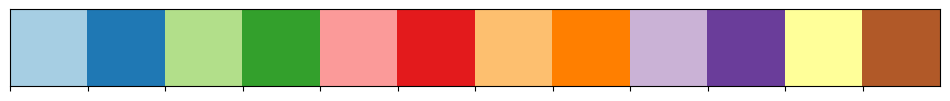

In [ ]:
# 시각화 옵션 함수
def plot_font():
  plt.rc('font', family='NanumGothic')
  %matplotlib inline
  plt.xticks(rotation=90, size = 9, fontweight='bold')
  plt.yticks(size = 9, fontweight='bold')

def plot_size01():
  plt.figure(figsize=(8, 4))

def plot_size02():
  plt.figure(figsize=(14, 6))

sns.palplot(sns.color_palette("Paired"))

---

## **데이터**
  - 데이터명: 온라인 식료품 데이터(Relay Foods)
  - 출처: 캐글의 오픈 데이터(https://github.com/springcoil/marsmodelling)

In [ ]:
# 데이터 불러오기
df = pd.read_excel('https://github.com/springcoil/marsmodelling/blob/master/relay-foods.xlsx?raw=true', sheet_name='Purchase Data - Full Study')
df.columns = ['주문ID', '주문날짜', '고객ID', '총청구액', '공용ID', '픽업ID', '픽업날짜']
del df['공용ID']

## **데이터 탐색: 함수 중심**

In [ ]:
# 데이터 행/열 확인
df.shape

(2891, 6)

In [ ]:
# 데이터 맨 앞쪽 결과 확인(default: 5)
df.head()

,주문ID,주문날짜,고객ID,총청구액,픽업ID,픽업날짜
0,262,2009-01-11,47,50.67,2,2009-01-12
1,278,2009-01-20,47,26.60,3,2009-01-20
2,294,2009-02-03,47,38.71,2,2009-02-04
3,301,2009-02-06,47,53.38,2,2009-02-09
4,302,2009-02-06,47,14.28,2,2009-02-09


In [ ]:
# 데이터 맨 마지막 결과 확인(default: 5)
df.tail()

,주문ID,주문날짜,고객ID,총청구액,픽업ID,픽업날짜
2886,3220,2010-03-08,393616,60.0155,15,2010-03-08
2887,3192,2010-03-07,394290,45.4300,12,2010-03-10
2888,3193,2010-03-07,394346,14.2100,15,2010-03-08
2889,3207,2010-03-08,395039,34.6200,4,2010-03-08
2890,3231,2010-03-08,396551,127.2800,3,2010-03-09


In [ ]:
# 데이터 변수명 확인
df.columns

Index(['주문ID', '주문날짜', '고객ID', '총청구액', '픽업ID', '픽업날짜'], dtype='object')

In [ ]:
# 데이터 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   주문ID    2891 non-null   int64         
 1   주문날짜    2891 non-null   datetime64[ns]
 2   고객ID    2891 non-null   int64         
 3   총청구액    2891 non-null   float64       
 4   픽업ID    2891 non-null   int64         
 5   픽업날짜    2891 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3)
memory usage: 135.6 KB


In [ ]:
# 데이터 타입 확인
df.dtypes

,0
주문ID,int64
주문날짜,datetime64[ns]
고객ID,int64
총청구액,float64
픽업ID,int64
픽업날짜,datetime64[ns]


In [ ]:
# 총청구액 변수의 평균값 확인
df['총청구액'].mean()

59.94718426150121

In [ ]:
# 총청구액 변수의 중앙값 확인
df['총청구액'].median()

44.81

In [ ]:
# 총청구액 변수의 최소값 확인
df['총청구액'].min()

1.39

In [ ]:
# 총청구액 변수의 최대값 확인
df['총청구액'].max()

690.9827

In [ ]:
# 총청구액 변수의 표준편차 확인
df['총청구액'].std()

55.009949045504435

In [ ]:
# 총청구액 변수의 개수 확인
df['총청구액'].count()

2891

In [ ]:
# 총청구액 변수 요소별 개수 확인
df['총청구액'].value_counts()

,count
총청구액,
8.01,6
79.60,5
16.54,4
7.36,4
95.00,4
...,...
88.33,1
29.76,1
106.47,1


In [ ]:
# 데이터 기본 기초통계값 확인
df.describe()

,주문ID,주문날짜,고객ID,총청구액,픽업ID,픽업날짜
count,2891.000000,2891,2891.000000,2891.000000,2891.000000,2891
mean,1763.644414,2009-10-24 08:57:56.720857856,85586.842269,59.947184,6.848495,2009-10-25 06:48:56.285022464
min,256.000000,2009-01-06 00:00:00,47.000000,1.390000,2.000000,2009-01-06 00:00:00
25%,1021.500000,2009-08-07 00:00:00,5534.000000,22.965000,4.000000,2009-08-07 00:00:00
50%,1778.000000,2009-11-15 00:00:00,42270.000000,44.810000,5.000000,2009-11-16 00:00:00
75%,2504.500000,2010-01-26 00:00:00,132044.000000,79.600000,7.000000,2010-01-27 00:00:00
max,3234.000000,2010-03-09 00:00:00,396551.000000,690.982700,20.000000,2010-03-10 00:00:00
std,855.881824,NaN,96952.929059,55.009949,4.613567,NaN


In [ ]:
# 데이터 모든 기초통계값 확인(include='all')
df.describe(include='all')

,주문ID,주문날짜,고객ID,총청구액,픽업ID,픽업날짜
count,2891.000000,2891,2891.000000,2891.000000,2891.000000,2891
mean,1763.644414,2009-10-24 08:57:56.720857856,85586.842269,59.947184,6.848495,2009-10-25 06:48:56.285022464
min,256.000000,2009-01-06 00:00:00,47.000000,1.390000,2.000000,2009-01-06 00:00:00
25%,1021.500000,2009-08-07 00:00:00,5534.000000,22.965000,4.000000,2009-08-07 00:00:00
50%,1778.000000,2009-11-15 00:00:00,42270.000000,44.810000,5.000000,2009-11-16 00:00:00
75%,2504.500000,2010-01-26 00:00:00,132044.000000,79.600000,7.000000,2010-01-27 00:00:00
max,3234.000000,2010-03-09 00:00:00,396551.000000,690.982700,20.000000,2010-03-10 00:00:00
std,855.881824,NaN,96952.929059,55.009949,4.613567,NaN


In [ ]:
# 데이터 내, 변수에 대한 상세 특징들을 연산함수를 통해 확인 가능한다.
# 보편적으로 시각화를 도출하기 전에 대략적인 수치 값을 확인하고자 수행한다.

___

## **데이터 탐색: 시각화 중심**

왜도(Skewness): 2.5265146120794437, 첨도(Kurtosis): 12.558680873925127



<Axes: title={'center': '총청구액에 대한 왜도/첨도'}, xlabel='총청구액', ylabel='Count'>

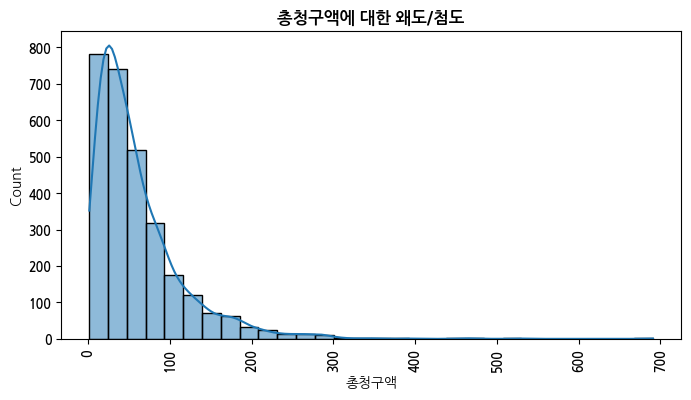

In [ ]:
# 분포모형 측정
skew = df['총청구액'].skew()           # 왜도(skewness) 측정
kurt = df['총청구액'].kurtosis()       # 첨도(Kurtosis) 측정
print('왜도(Skewness): {0}, 첨도(Kurtosis): {1}'.format(skew, kurt));print()

# 차트 옵션 설정
plot_size01()
plot_font()

# 히스토그램 시각화
plt.title('총청구액에 대한 왜도/첨도', fontweight='bold')
sns.histplot(df['총청구액'],
             kde=True,                 # 밀도 함수 곡선 추가
             bins=30)                  # bin 개수

왜도(Skewness): -0.39440275697560795, 첨도(Kurtosis): 0.08117379684042758



<Axes: title={'center': '총청구액에 대한 왜도/첨도'}, xlabel='총청구액', ylabel='Count'>

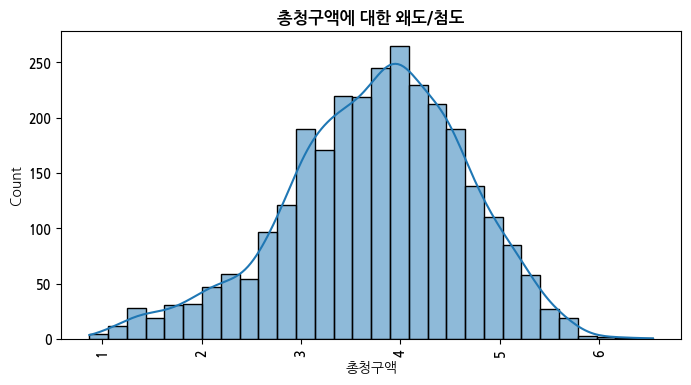

In [ ]:
# 로그변환: '총청구액' 변수
logsales = np.log1p(df['총청구액'])

# 분포모형 측정
log_skew = logsales.skew()           # 왜도(skewness) 측정
log_kurt = logsales.kurtosis()       # 첨도(Kurtosis) 측정
print('왜도(Skewness): {0}, 첨도(Kurtosis): {1}'.format(log_skew, log_kurt));print()

# 차트 옵션 설정
plot_size01()
plot_font()

# 히스토그램 시각화
plt.title('총청구액에 대한 왜도/첨도', fontweight='bold')
sns.histplot(logsales,
             kde=True,                 # 밀도 함수 곡선 추가
             bins=30)                  # bin 개수

In [ ]:
# 데이터 내, '총청구액' 변수에 대한 대칭여부(정규분포 여부)를 확인하고자, 왜도/첨도를 측정했다.
# 원본 데이터를 대상으로 측정했을 때, 양의 왜도/첨도 값을 확인했으며, 이를 통해 오른쪽 꼬리가 길면서 정규분포 보다 두꺼운 분포임을 확인했다.
# 반면, 로그변환을 거친 데이터를 대상으로 측정했을 때, 음의 왜도 값과 3보다 작은 첨도 값을 확인으며, 이를 통해 왼쪽 꼬리가 길면서 정규분포 보다 얇은 분포임을 확인했다.

# 이를 통해, 로그 변환은 정규성을 높이는데 도움이 되는 것을 확인했고, 이는 머신러닝 분야에서 정확한 값을 얻기 위해 활용된다.

____

## **상관분석**

In [ ]:
# 데이터 불러오기
df2 = sns.load_dataset('titanic')

# 불필요 데이터 제거
df2.drop(columns=['sibsp', 'parch', 'embarked', 'class', 'adult_male', 'embark_town', 'alive', 'deck'], inplace=True)

# 변수 요인 변환
df2 = df2.replace({'sex': {'male': '1', 'female': '2'}})
df2 = df2.astype({'alone': 'str'})
df2 = df2.replace({'alone': {'True': '1', 'False': '2'}})
df2 = df2.replace({'who': {'man': '1', 'woman': '2', 'child': '3'}})

# 결측치 제거
df2.dropna(axis=0, inplace=True)

print(df2.shape)
df2

(714, 7)


,survived,pclass,sex,age,fare,who,alone
0,0,3,1,22.0,7.2500,1,2
1,1,1,2,38.0,71.2833,2,2
2,1,3,2,26.0,7.9250,2,1
3,1,1,2,35.0,53.1000,2,2
4,0,3,1,35.0,8.0500,1,1
...,...,...,...,...,...,...,...
885,0,3,2,39.0,29.1250,2,2
886,0,2,1,27.0,13.0000,1,1
887,1,1,2,19.0,30.0000,2,1
889,1,1,1,26.0,30.0000,1,1


In [ ]:
# 변수설명
# survived:  생존여부(0: 사망 / 1: 생존)
# pclass: 객실등급(1: 가장 좋은 객실 / 3: 가장 않좋은 객실)
# sex: 성별(1: 남자 / 2: 여자)
# age: 나이
# fare: 요금
# who: 대상(1: 남자 / 2: 여자 / 3: 아이)
# alone: 혼자탑승했는지 여부(1: 혼자탑승 / 2: 가족과 함께 탑승)

<Axes: title={'center': '객실등급별 사암자 수가 얼마나 차이가날까?'}, xlabel='pclass', ylabel='survived'>

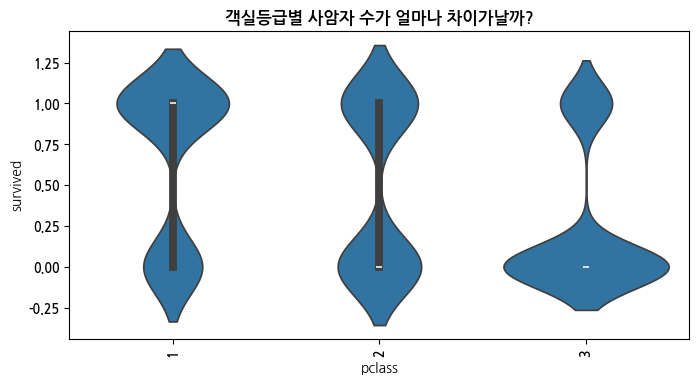

In [ ]:
# 질문A: 객식등급별 사망자 수가 엄라나 차이가 날까?

# 차트 옵션 설정
plot_size01()
plot_font()

# 히스토그램 시각화
plt.title('객실등급별 사암자 수가 얼마나 차이가날까?', fontweight='bold')
sns.violinplot(data=df2, x='pclass', y='survived')

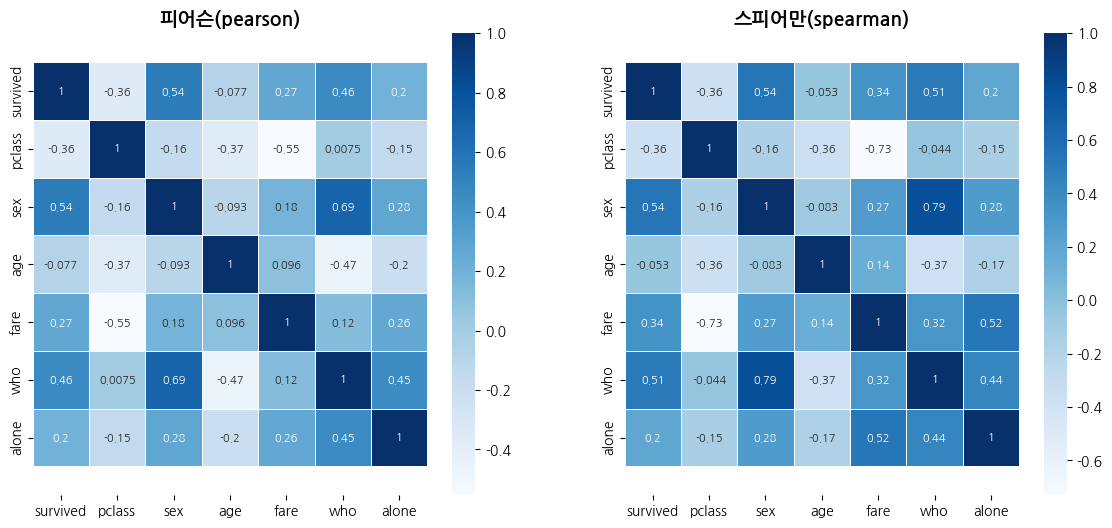

In [ ]:
# 상관계수 측정
pearson_matrix = df2.corr(method='pearson')      # 피어슨
spearman_matrix = df2.corr(method='spearman')    # 스피어만

# 차트 옵션 설정
plot_size02()

# 히트맵 시각화
plt.subplot(1, 2, 1)
plt.title("피어슨(pearson)", fontsize=14, fontweight ="bold")
ax1 = sns.heatmap(pearson_matrix, annot=True, linewidths=.5, cmap='Blues', annot_kws={"size": 8})
ylim1 = ax1.get_ylim()
ax1.set_ylim(ylim1[0] + 0.5, ylim1[1] - 0.5)

plt.subplot(1, 2, 2)
plt.title("스피어만(spearman)", fontsize=14, fontweight ="bold")
ax2 = sns.heatmap(spearman_matrix, annot=True, linewidths=.5, cmap='Blues', annot_kws={"size": 8})
ylim2 = ax2.get_ylim()
ax2.set_ylim(ylim2[0] + 0.5, ylim2[1] - 0.5)

plt.show()

In [ ]:
# 질문A("객식등급별 사망자 수가 엄라나 차이가 날까?")를 고려해보면,
# 객실등급(pclass)과 생존율(survived)의 상관계수를 확인했을 때 -0.36이란 약한 음의 상관관계가 있다는 것을 확인했다.
# 이를 통해, 좋은 객실은 생존율이 높고, 안좋은 객실일수록 생존율(0: 사망 / 1: 생존)이 낮다는 것을 확인했다.

In [ ]:
df2.corr()['survived'].sort_values(ascending=False)

,survived
survived,1.000000
sex,0.538826
who,0.456532
fare,0.268189
alone,0.196140
age,-0.077221
pclass,-0.359653


In [ ]:
# 상기 상관관계를 확인해보면 'sex, alone'이 가장 높게 산출되지만, 생존율과의 직접적인 관계성을 갖는다 생각되지 않는다 판단된다.
# 이에, 세번째로 관계성이 높은 '-0.35'이란 약한 음의 상관관계를 갖는 객실등급(pclass)이 가장 큰 영향을 미친다고 판단된다.

In [ ]:
# 상관계수 검정

# 귀무가설: 상관관계가 없다
# 대립가설: 상관관계가 있다.

print(stats.pearsonr(df2['survived'], df2['pclass']))
print(stats.spearmanr(df2['survived'], df2['pclass']))

PearsonRResult(statistic=-0.3596526820868458, pvalue=3.162103541666259e-23)
SignificanceResult(statistic=-0.36065641974949025, pvalue=2.346106779238448e-23)


In [ ]:
# 생존율과 객식등급의 상관계수 값 자체가 유의미한지 검증하고자 검정을 수행하였으며, 이를 통해 0.05보다 작은 것을 확인하면서 대립가설을 채택(즉, 상관관계가 있음)을 확인했다.

___

## **정규성검정: (시각화) Q-Q plot**

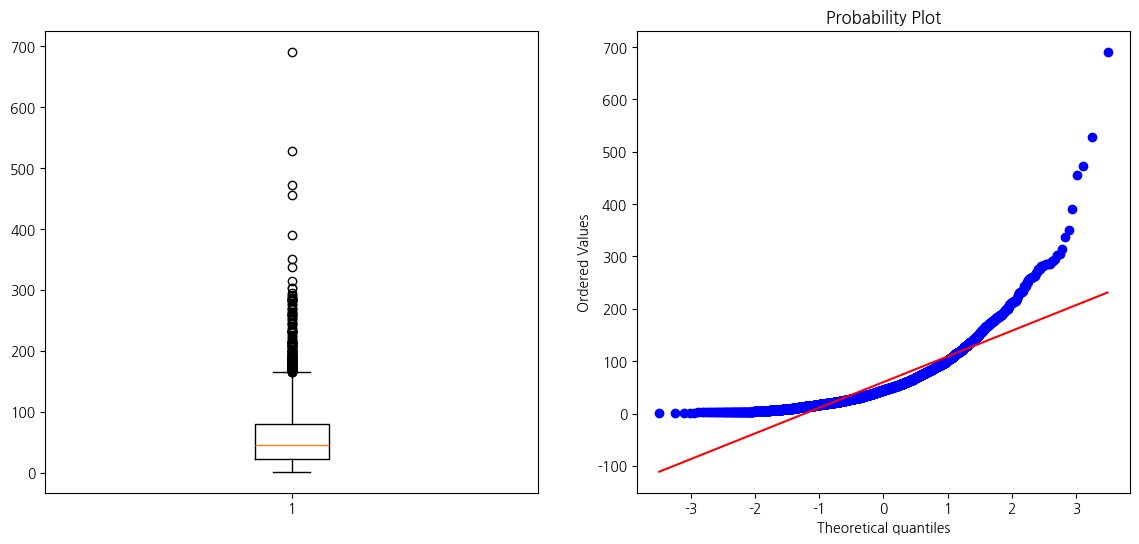

In [ ]:
# 총청구액 타입 변환
nd_x1 = np.array(df['총청구액'])     # ndarray 타입으로 변환

# 차트 옵션 설정
plot_size02()

# QQ플롯 시각화
plt.subplot(1, 2, 1)
plt.boxplot(nd_x1)

plt.subplot(1, 2, 2)
probplot(nd_x1, dist = stats.norm, plot=plt)

plt.show()

In [ ]:
# (박스플롯 해석)박스플롯의 3Q의 상단을 보면 많은 값들이 분포한 것을 확인할 수 있어 정규분포를 따른다고 보기 모호한 것을 확인했다.
# (QQ플롯 해석)그래프의 대각선은 '이론적 정규분포'를 의미하여, 관측분포와의 일치여부를 확인했을 때 약간의 추세를 보였지만 양끝이 어긋나는 것을 확인했다.

# 상기 그래프를 통해 정규분포를 따르지 않는다 판단되지만 보다 상세한 진단을 위해 통계적 검정 또한 수행했다.

## **정규성검정: (통계) Shapiro Test**

In [ ]:
# 샤피로 검정(Shapiro Test)
# 특징: 데이터 수가 2,000개 미만일 때 사용하기 적절한 정규성 검정 방법론(2,000개 초과할 때는 p-values값을 담보하지 못함)

# 귀무가설: 표본분포가 정규분포를 이루고 있다(즉, 정규분포와 유사함)
# 대립가설: 표본분포가 정규분포를 이루고 있지 않다(즉, 정규분포가 아님)

shapiro_test = stats.shapiro(x1)
shapiro_test

ShapiroResult(statistic=0.7933703660964966, pvalue=0.0)

## **정규성검정: (통계) Kolmogorov–Smirnov test**

In [ ]:
# 콜모고로프-스미르노프 검정(Kolmogorov–Smirnov test)
# 특징
# 1. 데이터 수가 2,000개 이상일 떄 사용하기 적절한 정규성 검정 방법론
# 2. 2개 데이터에 대한 검정이 가능하기 때문에 두 데이터의 분포가 다른지 'two-sided', 'less', 'greater' 기능 활용 가능
#    누적확률분포(CDF)를 통해 특정 데이터의 분포가 모집단의 데이터 분포와 얼마나 유사한지 비교 혹은 두 데이터의 누적활률분포 차이를 비교 가능

ks_test = stats.kstest(x1 , 'norm')
ks_test

KstestResult(statistic=0.9895001083333207, pvalue=0.0, statistic_location=2.76, statistic_sign=-1)

In [ ]:
# 상기 정규성 검정을 통해 pvalue가 0.0으로써 0.05보다 작아 통계적으로 유의미한 것을 확인했다
# 따라서, 귀무가설 기각/대립가설 채택하면서 정규분포를 따르지 않는다는 것을 확인했다.

___